In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as ttp
import re
import string
from sklearn.metrics import classification_report
df=pd.read_csv("/content/heart.csv")
df_last=df.tail(10)
df_last==df.to_csv("manual_testing1")
df=pd.read_csv("/content/heart.csv")
df_head=df.head(10)
df_head==df.to_csv("manual_testing2")
data_manual_testing=pd.concat([df_last,df_head], axis=0)
data_manual_testing.to_csv("manual_testing1.csv")
p=pd.read_csv("/content/manual_testing1.csv")
print(p)

    Unnamed: 0  age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0          293   67    1   2     152   212    0        0       150     0   
1          294   44    1   0     120   169    0        1       144     1   
2          295   63    1   0     140   187    0        0       144     1   
3          296   63    0   0     124   197    0        1       136     1   
4          297   59    1   0     164   176    1        0        90     0   
5          298   57    0   0     140   241    0        1       123     1   
6          299   45    1   3     110   264    0        1       132     0   
7          300   68    1   0     144   193    1        1       141     0   
8          301   57    1   0     130   131    0        1       115     1   
9          302   57    0   1     130   236    0        0       174     0   
10           0   63    1   3     145   233    1        0       150     0   
11           1   37    1   2     130   250    0        1       187     0   
12          

Axes(0.125,0.11;0.775x0.77)


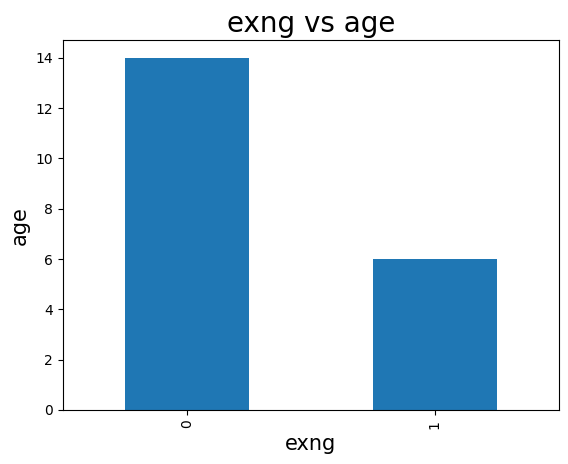

In [ ]:
print(p.groupby(['exng'])['age'].count().plot(kind="bar"))
p.groupby(['exng'])['age'].count()
plt.title("exng vs age",size=20)
plt.xlabel("exng",size=15)
plt.ylabel("age",size=15)
plt.show()

Axes(0.22375,0.11;0.5775x0.77)


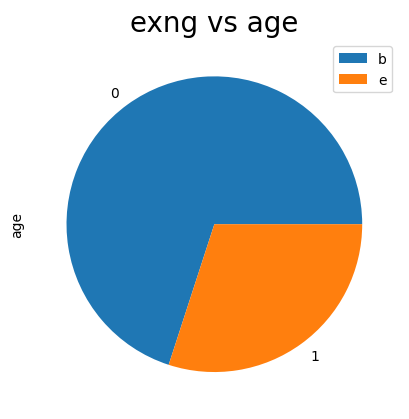

In [ ]:
print(p.groupby(['exng'])['age'].count().plot(kind="pie"))
p.groupby(['exng'])['age'].count()
plt.title("exng vs age",size=20)
plt.legend("best")
plt.show()

In [ ]:
data = p.drop(["age","exng"], axis=1)
data.head(10)

,Unnamed: 0,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall,output
0,293,1,2,152,212,0,0,150,0.8,1,0,3,0
1,294,1,0,120,169,0,1,144,2.8,0,0,1,0
2,295,1,0,140,187,0,0,144,4.0,2,2,3,0
3,296,0,0,124,197,0,1,136,0.0,1,0,2,0
4,297,1,0,164,176,1,0,90,1.0,1,2,1,0
5,298,0,0,140,241,0,1,123,0.2,1,0,3,0
6,299,1,3,110,264,0,1,132,1.2,1,0,3,0
7,300,1,0,144,193,1,1,141,3.4,1,2,3,0
8,301,1,0,130,131,0,1,115,1.2,1,1,3,0
9,302,0,1,130,236,0,0,174,0.0,1,1,2,0


In [ ]:
data=data.sample(frac=1)
data.head(10)

,Unnamed: 0,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall,output
3,296,0,0,124,197,0,1,136,0.0,1,0,2,0
0,293,1,2,152,212,0,0,150,0.8,1,0,3,0
10,0,1,3,145,233,1,0,150,2.3,0,0,1,1
6,299,1,3,110,264,0,1,132,1.2,1,0,3,0
4,297,1,0,164,176,1,0,90,1.0,1,2,1,0
18,8,1,2,172,199,1,1,162,0.5,2,0,3,1
16,6,0,1,140,294,0,0,153,1.3,1,0,2,1
5,298,0,0,140,241,0,1,123,0.2,1,0,3,0
7,300,1,0,144,193,1,1,141,3.4,1,2,3,0
14,4,0,0,120,354,0,1,163,0.6,2,0,2,1


In [ ]:
 data.isnull().sum()

Unnamed: 0    0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
oldpeak       0
slp           0
caa           0
thall         0
output        0
dtype: int64

In [ ]:
x=data["Unnamed: 0"]
y=data["cp"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
x=data["Unnamed: 0"]
y=data["cp"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!pip install scikit-learn
vector = TfidfVectorizer()
x_train = x_train.astype(str)
x_test = x_test.astype(str)
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test) # Predict using the linear model
print(classification_report(y_test,pred_LR))

Accuracy is 0.4
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.40         5
   macro avg       0.13      0.33      0.19         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
